In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install sidetable
import sidetable as stb
from scipy import stats
import requests
from bs4 import BeautifulSoup
#!pip install selenium
from selenium import webdriver

In [17]:
model = []
company = []
km = []
price = []
fuel = []
city = []
EMIStarts = []
year= []



# Model
for i in range(1,14):
    url = (f"https://www.carwale.com/used/cars-for-sale/#sc=-1&so=-1&city=105&pc=105&car=7+16+8+10&pn={i}&lcr=48&ldr=0&lir=0")
    page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
    soup = BeautifulSoup(page.text)
    a = soup.find_all("span",class_="spancarname card-detail-block__title-text-with-year")
    for i in a:
        text = i.text.strip()
        regex = re.findall("\W(\w+\D\w+).+",text)
        model.append(regex[0])

    # KiloMeter
    b = soup.find_all("span",class_="slkms")
    for i in b:
        text = i.text
        regex = re.findall("(\d+\W\d+).+",text)
        km.append(regex[0])
        
    # Fuel
    c = soup.find_all("span",class_="fuel")
    for i in c:
        text = i.text.rstrip("\xa0\xa0|\xa0\xa0")
        fuel.append(text)
        #if text:
         #   fuel.append(text)
        #else:
         #   fuel.append(np.NaN)
        
    # price
    d = soup.find_all("span",class_="rupee-lac slprice")
    for i in d:
        text = i.text
        regex = re.findall("\s(\d+\W\d+)",text)
        if regex:
            price.append(regex[0])
        else:
            price.append(np.nan)
            
    # City
    e = soup.find_all("div",class_="card-detail-block")
    for i in e:
        b=i.find("span",class_="cityName")
        if b:
            city.append(b.text)
        else:
            city.append(np.nan)
        
        
    # EMIStarts 
    f = soup.find_all("div",class_="card-detail-block")
    for i in f:
        a=i.find("button",class_="card-detail__emi-link text-link")
        if a:
            EMIStarts.append(a.text)
        else:
            EMIStarts.append(np.nan)
    # Year
    g = soup.find_all("span",class_="slYear card-detail-block__title-text-with-year")
    for i in g:
        year.append(i.text.strip())
        
        
    # company 
    h = soup.find_all("span",class_="spancarname card-detail-block__title-text-with-year")
    for i in h:
        text = i.text
        regex = re.findall("\W(\w+\w).+",text)
        company.append(regex[0])

In [18]:
print(len(model),len(price),len(km),len(fuel), len(company), len(year), len(EMIStarts), len(city))

412 412 412 412 412 412 412 412


In [19]:
EMIStarts

['₹13,036',
 '₹12,455',
 nan,
 nan,
 '₹7,306',
 '₹2,906',
 '₹13,285',
 '₹31,552',
 '₹6,393',
 '₹7,057',
 '₹9,133',
 '₹19,097',
 '₹9,133',
 '₹8,718',
 nan,
 nan,
 '₹6,227',
 '₹11,126',
 '₹6,891',
 nan,
 '₹4,400',
 '₹9,598',
 '₹9,631',
 '₹10,927',
 '₹7,888',
 '₹64,766',
 '₹51,480',
 '₹15,278',
 '₹19,761',
 '₹10,379',
 '₹14,447',
 '₹10,146',
 '₹13,036',
 '₹19,928',
 '₹83,033',
 nan,
 '₹10,794',
 '₹63,105',
 '₹9,050',
 '₹6,393',
 '₹7,057',
 '₹9,133',
 '₹19,097',
 '₹9,133',
 '₹8,718',
 nan,
 '₹12,455',
 nan,
 '₹6,227',
 '₹13,119',
 '₹11,458',
 '₹9,880',
 '₹7,888',
 '₹14,447',
 '₹64,766',
 '₹51,480',
 '₹15,278',
 '₹19,761',
 '₹10,379',
 '₹10,927',
 '₹11,126',
 '₹6,891',
 nan,
 nan,
 '₹9,050',
 '₹81,372',
 '₹15,278',
 '₹68,004',
 '₹2.57 L',
 nan,
 '₹29,476',
 '₹6,393',
 '₹7,057',
 '₹9,133',
 '₹19,097',
 '₹9,133',
 '₹8,718',
 nan,
 '₹12,455',
 nan,
 '₹6,227',
 '₹11,126',
 '₹6,891',
 nan,
 '₹9,598',
 '₹4,400',
 '₹9,631',
 '₹10,927',
 '₹7,888',
 '₹51,480',
 '₹15,278',
 '₹19,761',
 '₹10,379',
 '₹

In [20]:
price

['7.85',
 '7.5',
 '6.5',
 '15.9',
 '4.4',
 '1.75',
 nan,
 nan,
 '3.85',
 '4.25',
 '5.5',
 '11.5',
 '5.5',
 '5.25',
 '5.35',
 nan,
 '3.75',
 '6.7',
 '4.15',
 '8.25',
 '2.65',
 '5.78',
 '5.8',
 '6.58',
 '4.75',
 nan,
 nan,
 '9.2',
 '11.9',
 '6.25',
 '8.7',
 '6.11',
 '7.85',
 nan,
 nan,
 nan,
 '6.5',
 nan,
 '5.45',
 '3.85',
 '4.25',
 '5.5',
 '11.5',
 '5.5',
 '5.25',
 '5.35',
 '7.5',
 nan,
 '3.75',
 '7.9',
 '6.9',
 '5.95',
 '4.75',
 '8.7',
 nan,
 nan,
 '9.2',
 '11.9',
 '6.25',
 '6.58',
 '6.7',
 '4.15',
 '8.25',
 '6.5',
 '5.45',
 nan,
 '9.2',
 '40.95',
 '1.55',
 '6.25',
 '17.75',
 '3.85',
 '4.25',
 '5.5',
 '11.5',
 '5.5',
 '5.25',
 '5.35',
 '7.5',
 nan,
 '3.75',
 '6.7',
 '4.15',
 '8.25',
 '5.78',
 '2.65',
 '5.8',
 '6.58',
 '4.75',
 nan,
 '9.2',
 '11.9',
 '6.25',
 nan,
 nan,
 '2.99',
 '10.75',
 '7.85',
 '2.3',
 nan,
 '7.65',
 '4.99',
 '5.95',
 '3.85',
 '4.25',
 '5.5',
 '11.5',
 '5.5',
 '5.25',
 '5.35',
 '7.5',
 nan,
 '3.75',
 '5.7',
 '2.65',
 '5.78',
 '6.7',
 '4.15',
 '8.25',
 '6.58',
 '5.8'

In [21]:
km

['1,89',
 '16,339',
 '68,962',
 '75,000',
 '32,682',
 '66,000',
 '83,226',
 '68,894',
 '55,488',
 '51,602',
 '34,559',
 '14,941',
 '79,649',
 '44,620',
 '58,235',
 '71,788',
 '79,289',
 '78,184',
 '3,436',
 '41,468',
 '65,952',
 '47,554',
 '58,595',
 '58,865',
 '40,699',
 '15,971',
 '19,742',
 '22,117',
 '50,824',
 '24,982',
 '44,091',
 '51,349',
 '32,516',
 '50,965',
 '43,000',
 '70,143',
 '98,000',
 '29,699',
 '49,000',
 '55,488',
 '51,602',
 '34,559',
 '14,941',
 '79,649',
 '44,620',
 '58,235',
 '16,339',
 '71,788',
 '79,289',
 '68,085',
 '74,290',
 '12,290',
 '89,739',
 '44,091',
 '15,971',
 '19,742',
 '22,117',
 '50,824',
 '24,982',
 '58,865',
 '78,184',
 '3,436',
 '41,468',
 '68,962',
 '49,000',
 '13,687',
 '65,094',
 '9,700',
 '49,000',
 '27,385',
 '33,000',
 '55,488',
 '51,602',
 '34,559',
 '14,941',
 '79,649',
 '44,620',
 '58,235',
 '16,339',
 '71,788',
 '79,289',
 '78,184',
 '3,436',
 '41,468',
 '47,554',
 '65,952',
 '58,595',
 '58,865',
 '40,699',
 '19,742',
 '22,117',
 '50,

In [22]:
fuel

['Diesel',
 'Petrol',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'CNG',
 'Electric',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Diesel',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'CNG',
 'Petrol',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Diesel',
 'Petrol',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Diesel',
 'Petrol',
 'CNG',
 'Diesel',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'CNG',
 'Petrol',
 'Diesel',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol'

In [23]:
city

['Mumbai',
 'Kolkata',
 'Jalgaon',
 'Lucknow',
 'Mumbai',
 'Lucknow',
 'Mumbai',
 'Mumbai',
 'Lucknow',
 'Pune',
 'Pune',
 'Pune',
 'Pune',
 'Delhi',
 'Delhi',
 'Hyderabad',
 'Kanpur',
 'Delhi',
 'Kanpur',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Jamshedpur',
 'Lucknow',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Pune',
 'Nagpur',
 'Bangalore',
 'Kolkata',
 'Mumbai',
 'Chennai',
 'Panchkula',
 'Hyderabad',
 'Mumbai',
 'Lucknow',
 'Pune',
 'Pune',
 'Pune',
 'Pune',
 'Delhi',
 'Delhi',
 'Kolkata',
 'Hyderabad',
 'Kanpur',
 'Pune',
 'Pune',
 'Pune',
 'Pune',
 'Pune',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Jamshedpur',
 'Delhi',
 'Kanpur',
 'Delhi',
 'Jalgaon',
 'Mumbai',
 'Mumbai',
 'Kolkata',
 'Indore',
 'Gurgaon',
 'Mumbai',
 'Bangalore',
 'Lucknow',
 'Pune',
 'Pune',
 'Pune',
 'Pune',
 'Delhi',
 'Delhi',
 'Kolkata',
 'Hyderabad',
 'Kanpur',
 'Delhi',
 'Kanpur',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Jamshedpur',
 'Lucknow',
 'Mumbai',
 'Mumbai',
 'Mu

In [24]:
year

['2013',
 '2018',
 '2016',
 '2011',
 '2014',
 '2013',
 '2017',
 '2020',
 '2015',
 '2013',
 '2015',
 '2019',
 '2014',
 '2019',
 '2017',
 '2017',
 '2013',
 '2017',
 '2021',
 '2017',
 '2014',
 '2014',
 '2019',
 '2013',
 '2018',
 '2019',
 '2021',
 '2018',
 '2018',
 '2017',
 '2019',
 '2017',
 '2019',
 '2015',
 '2018',
 '2013',
 '2015',
 '2021',
 '2015',
 '2015',
 '2013',
 '2015',
 '2019',
 '2014',
 '2019',
 '2017',
 '2018',
 '2017',
 '2013',
 '2016',
 '2018',
 '2022',
 '2018',
 '2019',
 '2019',
 '2021',
 '2018',
 '2018',
 '2017',
 '2013',
 '2017',
 '2021',
 '2017',
 '2016',
 '2015',
 '2017',
 '2019',
 '2021',
 '2017',
 '2019',
 '2013',
 '2015',
 '2013',
 '2015',
 '2019',
 '2014',
 '2019',
 '2017',
 '2018',
 '2017',
 '2013',
 '2017',
 '2021',
 '2017',
 '2014',
 '2014',
 '2019',
 '2013',
 '2018',
 '2021',
 '2018',
 '2018',
 '2017',
 '2019',
 '2021',
 '2013',
 '2019',
 '2019',
 '2010',
 '2016',
 '2021',
 '2019',
 '2017',
 '2015',
 '2013',
 '2015',
 '2019',
 '2014',
 '2019',
 '2017',
 '2018',
 

In [25]:
company

['Toyota',
 'Hyundai',
 'Volkswagen',
 'BMW',
 'Maruti',
 'Chevrolet',
 'Maruti',
 'MG',
 'Maruti',
 'Toyota',
 'Skoda',
 'Hyundai',
 'Hyundai',
 'Hyundai',
 'Honda',
 'Ford',
 'Hyundai',
 'Maruti',
 'Renault',
 'Maruti',
 'Maruti',
 'Honda',
 'Maruti',
 'Mahindra',
 'Hyundai',
 'Mercedes',
 'Toyota',
 'Honda',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Volvo',
 'Mercedes',
 'Audi',
 'Honda',
 'MG',
 'Maruti',
 'Maruti',
 'Toyota',
 'Skoda',
 'Hyundai',
 'Hyundai',
 'Hyundai',
 'Honda',
 'Hyundai',
 'Ford',
 'Hyundai',
 'Honda',
 'Volkswagen',
 'Maruti',
 'Maruti',
 'Maruti',
 'Mercedes',
 'Toyota',
 'Honda',
 'Hyundai',
 'Maruti',
 'Mahindra',
 'Maruti',
 'Renault',
 'Maruti',
 'Volkswagen',
 'Maruti',
 'BMW',
 'Hyundai',
 'MINI',
 'Mercedes',
 'Maruti',
 'BMW',
 'Maruti',
 'Toyota',
 'Skoda',
 'Hyundai',
 'Hyundai',
 'Hyundai',
 'Honda',
 'Hyundai',
 'Ford',
 'Hyundai',
 'Maruti',
 'Renault',
 'Maruti',
 'Honda',
 'Maruti',
 'Maruti',
 'Mahindra',
 'Hyundai',
 'Toyota

In [26]:
data = {"Company":company, "Model":model, "Year":year, "Price in Lak":price, "Fuel":fuel, "Kilometer":km, 
        "City":city, "EMIstarts":EMIStarts}

In [27]:
df1=pd.DataFrame(data)
df1

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Toyota,Innova 2,2013,7.85,Diesel,"1,89",Mumbai,"₹13,036"
1,Hyundai,Verna 1,2018,7.5,Petrol,"16,339",Kolkata,"₹12,455"
2,Volkswagen,Ameo Highline,2016,6.5,Diesel,"68,962",Jalgaon,NaN
3,BMW,7 Series,2011,15.9,Diesel,"75,000",Lucknow,NaN
4,Maruti,Suzuki Swift,2014,4.4,Petrol,"32,682",Mumbai,"₹7,306"
...,...,...,...,...,...,...,...,...
407,Honda,City V,2018,9.2,Petrol,"22,117",Mumbai,"₹15,278"
408,Hyundai,Creta SX,2018,11.9,Petrol,"50,824",Mumbai,"₹19,761"
409,Maruti,Suzuki Swift,2017,6.25,Diesel,"24,982",Mumbai,"₹10,379"
410,Mercedes,Benz C,2019,NaN,Petrol,"15,971",Mumbai,"₹64,766"


# Converting dataframe to csv file

In [28]:
df1.to_csv(r"Carewale_final_project Data.csv")

# And reading csv file

In [2]:
Carwale = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\Carewale_final_project Data.csv")

In [3]:
Carwale

,Unnamed: 0,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,0,Toyota,Innova 2,2013,7.85,Diesel,"1,89",Mumbai,"₹13,036"
1,1,Hyundai,Verna 1,2018,7.50,Petrol,"16,339",Kolkata,"₹12,455"
2,2,Volkswagen,Ameo Highline,2016,6.50,Diesel,"68,962",Jalgaon,NaN
3,3,BMW,7 Series,2011,15.90,Diesel,"75,000",Lucknow,NaN
4,4,Maruti,Suzuki Swift,2014,4.40,Petrol,"32,682",Mumbai,"₹7,306"
...,...,...,...,...,...,...,...,...,...
407,407,Honda,City V,2018,9.20,Petrol,"22,117",Mumbai,"₹15,278"
408,408,Hyundai,Creta SX,2018,11.90,Petrol,"50,824",Mumbai,"₹19,761"
409,409,Maruti,Suzuki Swift,2017,6.25,Diesel,"24,982",Mumbai,"₹10,379"
410,410,Mercedes,Benz C,2019,NaN,Petrol,"15,971",Mumbai,"₹64,766"


In [4]:
Carwale.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Toyota,Innova 2,2013,7.85,Diesel,"1,89",Mumbai,"₹13,036"
1,Hyundai,Verna 1,2018,7.50,Petrol,"16,339",Kolkata,"₹12,455"
2,Volkswagen,Ameo Highline,2016,6.50,Diesel,"68,962",Jalgaon,NaN
3,BMW,7 Series,2011,15.90,Diesel,"75,000",Lucknow,NaN
4,Maruti,Suzuki Swift,2014,4.40,Petrol,"32,682",Mumbai,"₹7,306"
...,...,...,...,...,...,...,...,...
407,Honda,City V,2018,9.20,Petrol,"22,117",Mumbai,"₹15,278"
408,Hyundai,Creta SX,2018,11.90,Petrol,"50,824",Mumbai,"₹19,761"
409,Maruti,Suzuki Swift,2017,6.25,Diesel,"24,982",Mumbai,"₹10,379"
410,Mercedes,Benz C,2019,NaN,Petrol,"15,971",Mumbai,"₹64,766"


# Data manipulation

In [5]:
Carwale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    412 non-null    int64  
 1   Company       412 non-null    object 
 2   Model         412 non-null    object 
 3   Year          412 non-null    int64  
 4   Price in Lak  358 non-null    float64
 5   Fuel          412 non-null    object 
 6   Kilometer     412 non-null    object 
 7   City          412 non-null    object 
 8   EMIstarts     352 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 29.1+ KB


In [6]:
Carwale.isnull().sum()

Unnamed: 0       0
Company          0
Model            0
Year             0
Price in Lak    54
Fuel             0
Kilometer        0
City             0
EMIstarts       60
dtype: int64

In [7]:
a = Carwale[Carwale['EMIstarts'].isnull()]
a.drop(["Unnamed: 0"], axis = 1)
            

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
2,Volkswagen,Ameo Highline,2016,6.50,Diesel,"68,962",Jalgaon,NaN
3,BMW,7 Series,2011,15.90,Diesel,"75,000",Lucknow,NaN
14,Honda,Amaze 1,2017,5.35,Petrol,"58,235",Delhi,NaN
15,Ford,Endeavour Titanium,2017,NaN,Diesel,"71,788",Hyderabad,NaN
19,Maruti,Suzuki Ciaz,2017,8.25,Petrol,"41,468",Delhi,NaN
35,Audi,A6 2,2013,NaN,Diesel,"70,143",Chennai,NaN
45,Honda,Amaze 1,2017,5.35,Petrol,"58,235",Delhi,NaN
47,Ford,Endeavour Titanium,2017,NaN,Diesel,"71,788",Hyderabad,NaN
62,Maruti,Suzuki Ciaz,2017,8.25,Petrol,"41,468",Delhi,NaN
63,Volkswagen,Ameo Highline,2016,6.50,Diesel,"68,962",Jalgaon,NaN


In [8]:
Carwale['EMIstarts'].fillna(Carwale['EMIstarts'].mode()[0]).iloc[[2,3,14,15,19,35,45,47,62,63,69,77,79,83,98,109,111,118,141,143,147,160,162,163,165,173,175,185,193,196,204,206,221,226,236,238,242,255,257,268,270,280,299,301,305,318,319,324,331,333,343,349,351,354,364,371,386,394,396,400]]

2      ₹9,133
3      ₹9,133
14     ₹9,133
15     ₹9,133
19     ₹9,133
35     ₹9,133
45     ₹9,133
47     ₹9,133
62     ₹9,133
63     ₹9,133
69     ₹9,133
77     ₹9,133
79     ₹9,133
83     ₹9,133
98     ₹9,133
109    ₹9,133
111    ₹9,133
118    ₹9,133
141    ₹9,133
143    ₹9,133
147    ₹9,133
160    ₹9,133
162    ₹9,133
163    ₹9,133
165    ₹9,133
173    ₹9,133
175    ₹9,133
185    ₹9,133
193    ₹9,133
196    ₹9,133
204    ₹9,133
206    ₹9,133
221    ₹9,133
226    ₹9,133
236    ₹9,133
238    ₹9,133
242    ₹9,133
255    ₹9,133
257    ₹9,133
268    ₹9,133
270    ₹9,133
280    ₹9,133
299    ₹9,133
301    ₹9,133
305    ₹9,133
318    ₹9,133
319    ₹9,133
324    ₹9,133
331    ₹9,133
333    ₹9,133
343    ₹9,133
349    ₹9,133
351    ₹9,133
354    ₹9,133
364    ₹9,133
371    ₹9,133
386    ₹9,133
394    ₹9,133
396    ₹9,133
400    ₹9,133
Name: EMIstarts, dtype: object

In [9]:
Carwale['EMIstarts'].fillna(Carwale['EMIstarts'].mode()[0], inplace = True)
Carwale['EMIstarts'].isnull().sum()

0

In [10]:
Carwale_1 = Carwale.fillna(Carwale.groupby(['EMIstarts']).transform(lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode()), inplace = False)

In [11]:
Carwale['Price in Lak'].fillna(Carwale['Price in Lak'].median(), inplace = True)

In [12]:
Carwale["Price in Lak"].isnull().sum()

0

In [13]:
#median_mode = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]

In [14]:
Carwale_1 = Carwale.fillna(Carwale.groupby(['Price in Lak']).transform(lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode()), inplace = False)

In [15]:
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Toyota,Innova 2,2013,7.85,Diesel,"1,89",Mumbai,"₹13,036"
1,Hyundai,Verna 1,2018,7.50,Petrol,"16,339",Kolkata,"₹12,455"
2,Volkswagen,Ameo Highline,2016,6.50,Diesel,"68,962",Jalgaon,"₹9,133"
3,BMW,7 Series,2011,15.90,Diesel,"75,000",Lucknow,"₹9,133"
4,Maruti,Suzuki Swift,2014,4.40,Petrol,"32,682",Mumbai,"₹7,306"
...,...,...,...,...,...,...,...,...
407,Honda,City V,2018,9.20,Petrol,"22,117",Mumbai,"₹15,278"
408,Hyundai,Creta SX,2018,11.90,Petrol,"50,824",Mumbai,"₹19,761"
409,Maruti,Suzuki Swift,2017,6.25,Diesel,"24,982",Mumbai,"₹10,379"
410,Mercedes,Benz C,2019,5.80,Petrol,"15,971",Mumbai,"₹64,766"


# Data Cleaning 

In [16]:
Carwale_1["Kilometer"] = Carwale_1["Kilometer"].str.replace(r"[\,]",'')

C:\Users\hp\AppData\Local\Temp\ipykernel_12540\1908954068.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Carwale_1["Kilometer"] = Carwale_1["Kilometer"].str.replace(r"[\,]",'')


In [17]:
Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\₹ ]",'')

C:\Users\hp\AppData\Local\Temp\ipykernel_12540\4195363638.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\₹ ]",'')


In [18]:
Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\, ]",'')

C:\Users\hp\AppData\Local\Temp\ipykernel_12540\3585817811.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\, ]",'')


In [19]:
Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\ Lakh ]",'')

C:\Users\hp\AppData\Local\Temp\ipykernel_12540\4168121682.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\ Lakh ]",'')


In [20]:
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Toyota,Innova 2,2013,7.85,Diesel,189,Mumbai,13036
1,Hyundai,Verna 1,2018,7.50,Petrol,16339,Kolkata,12455
2,Volkswagen,Ameo Highline,2016,6.50,Diesel,68962,Jalgaon,9133
3,BMW,7 Series,2011,15.90,Diesel,75000,Lucknow,9133
4,Maruti,Suzuki Swift,2014,4.40,Petrol,32682,Mumbai,7306
...,...,...,...,...,...,...,...,...
407,Honda,City V,2018,9.20,Petrol,22117,Mumbai,15278
408,Hyundai,Creta SX,2018,11.90,Petrol,50824,Mumbai,19761
409,Maruti,Suzuki Swift,2017,6.25,Diesel,24982,Mumbai,10379
410,Mercedes,Benz C,2019,5.80,Petrol,15971,Mumbai,64766


# Converting dtypes

In [21]:
Carwale_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    412 non-null    int64  
 1   Company       412 non-null    object 
 2   Model         412 non-null    object 
 3   Year          412 non-null    int64  
 4   Price in Lak  412 non-null    float64
 5   Fuel          412 non-null    object 
 6   Kilometer     412 non-null    object 
 7   City          412 non-null    object 
 8   EMIstarts     412 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 29.1+ KB


In [22]:
Carwale_1[["Kilometer"]] = Carwale_1[["Kilometer"]].astype(int)

In [25]:
Carwale_1[["EMIstarts"]] = Carwale_1[["EMIstarts"]].astype(int)

In [26]:
Carwale_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    412 non-null    int64  
 1   Company       412 non-null    object 
 2   Model         412 non-null    object 
 3   Year          412 non-null    int64  
 4   Price in Lak  412 non-null    float64
 5   Fuel          412 non-null    object 
 6   Kilometer     412 non-null    int32  
 7   City          412 non-null    object 
 8   EMIstarts     412 non-null    int32  
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 25.9+ KB


In [27]:
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Toyota,Innova 2,2013,7.85,Diesel,189,Mumbai,13036
1,Hyundai,Verna 1,2018,7.50,Petrol,16339,Kolkata,12455
2,Volkswagen,Ameo Highline,2016,6.50,Diesel,68962,Jalgaon,9133
3,BMW,7 Series,2011,15.90,Diesel,75000,Lucknow,9133
4,Maruti,Suzuki Swift,2014,4.40,Petrol,32682,Mumbai,7306
...,...,...,...,...,...,...,...,...
407,Honda,City V,2018,9.20,Petrol,22117,Mumbai,15278
408,Hyundai,Creta SX,2018,11.90,Petrol,50824,Mumbai,19761
409,Maruti,Suzuki Swift,2017,6.25,Diesel,24982,Mumbai,10379
410,Mercedes,Benz C,2019,5.80,Petrol,15971,Mumbai,64766


In [28]:
# Categorical data

Carwale_1.describe(include = ["object"]).T

,count,unique,top,freq
Company,412,22,Maruti,110
Model,412,80,Suzuki Swift,30
Fuel,412,4,Petrol,242
City,412,25,Delhi,98


In [29]:
# Continuous data

Carwale_1.describe(include = ["float64", "int32","int64"]).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,412.0,205.500000,119.078406,0.00,102.75,205.5,308.25,411.00
Year,412.0,2016.808252,2.691725,2008.00,2015.00,2017.0,2019.00,2022.00
Price in Lak,412.0,7.312791,6.122867,1.05,4.99,5.8,7.50,53.75
Kilometer,412.0,46372.194175,23808.427950,106.00,24982.00,47554.0,65952.00,99000.00
EMIstarts,412.0,16223.771845,17289.283349,1.00,8718.00,9598.0,14447.00,96318.00


In [30]:
Carwale_1.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,412.0,NaN,NaN,NaN,205.5,119.078406,0.0,102.75,205.5,308.25,411.0
Company,412,22,Maruti,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,412,80,Suzuki Swift,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,412.0,NaN,NaN,NaN,2016.808252,2.691725,2008.0,2015.0,2017.0,2019.0,2022.0
Price in Lak,412.0,NaN,NaN,NaN,7.312791,6.122867,1.05,4.99,5.8,7.5,53.75
Fuel,412,4,Petrol,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometer,412.0,NaN,NaN,NaN,46372.194175,23808.42795,106.0,24982.0,47554.0,65952.0,99000.0
City,412,25,Delhi,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMIstarts,412.0,NaN,NaN,NaN,16223.771845,17289.283349,1.0,8718.0,9598.0,14447.0,96318.0


# Working with Outliers

In [31]:
Carwale_1.shape

(412, 9)

<AxesSubplot:xlabel='EMIstarts'>

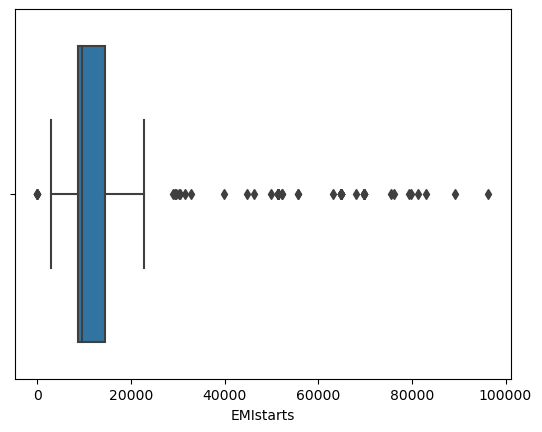

In [32]:
# box-plot for EMIstarts

sns.boxplot(data = Carwale_1, x = Carwale_1["EMIstarts"])

In [33]:
Q1 = Carwale_1["EMIstarts"].quantile(0.25)
Q3 = Carwale_1["EMIstarts"].quantile(0.75)

IQR = Q3-Q1

lower_whisker = Q1-1.5*IQR

upper_whisker = Q3+1.5*IQR

print(Q1,"-------" ,Q3,"-------", IQR, end = "\n")

print(lower_whisker,"--------", upper_whisker)


8718.0 ------- 14447.0 ------- 5729.0
124.5 -------- 23040.5


In [34]:
Carwale_1 = Carwale_1[Carwale_1["EMIstarts"]< upper_whisker] 
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Toyota,Innova 2,2013,7.85,Diesel,189,Mumbai,13036
1,Hyundai,Verna 1,2018,7.50,Petrol,16339,Kolkata,12455
2,Volkswagen,Ameo Highline,2016,6.50,Diesel,68962,Jalgaon,9133
3,BMW,7 Series,2011,15.90,Diesel,75000,Lucknow,9133
4,Maruti,Suzuki Swift,2014,4.40,Petrol,32682,Mumbai,7306
...,...,...,...,...,...,...,...,...
404,Mahindra,XUV500 W8,2013,6.58,Diesel,58865,Jamshedpur,10927
405,Hyundai,Grand i10,2018,4.75,Petrol,40699,Lucknow,7888
407,Honda,City V,2018,9.20,Petrol,22117,Mumbai,15278
408,Hyundai,Creta SX,2018,11.90,Petrol,50824,Mumbai,19761


In [35]:
Carwale_1

,Unnamed: 0,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,0,Toyota,Innova 2,2013,7.85,Diesel,189,Mumbai,13036
1,1,Hyundai,Verna 1,2018,7.50,Petrol,16339,Kolkata,12455
2,2,Volkswagen,Ameo Highline,2016,6.50,Diesel,68962,Jalgaon,9133
3,3,BMW,7 Series,2011,15.90,Diesel,75000,Lucknow,9133
4,4,Maruti,Suzuki Swift,2014,4.40,Petrol,32682,Mumbai,7306
...,...,...,...,...,...,...,...,...,...
404,404,Mahindra,XUV500 W8,2013,6.58,Diesel,58865,Jamshedpur,10927
405,405,Hyundai,Grand i10,2018,4.75,Petrol,40699,Lucknow,7888
407,407,Honda,City V,2018,9.20,Petrol,22117,Mumbai,15278
408,408,Hyundai,Creta SX,2018,11.90,Petrol,50824,Mumbai,19761


In [36]:
Carwale_1.shape

(360, 9)

<AxesSubplot:xlabel='EMIstarts'>

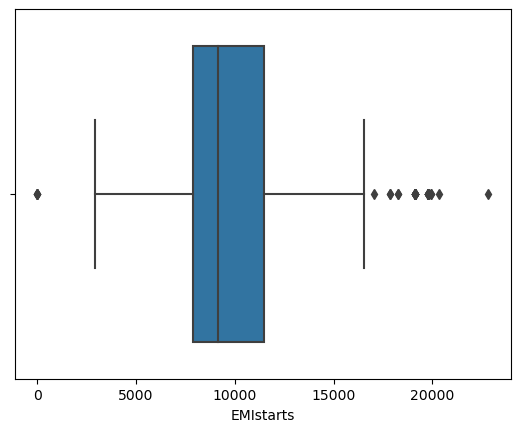

In [37]:
sns.boxplot(data=Carwale_1,x=Carwale_1["EMIstarts"])

In [38]:
Carwale_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 409
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    360 non-null    int64  
 1   Company       360 non-null    object 
 2   Model         360 non-null    object 
 3   Year          360 non-null    int64  
 4   Price in Lak  360 non-null    float64
 5   Fuel          360 non-null    object 
 6   Kilometer     360 non-null    int32  
 7   City          360 non-null    object 
 8   EMIstarts     360 non-null    int32  
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 25.3+ KB


<AxesSubplot:xlabel='Year'>

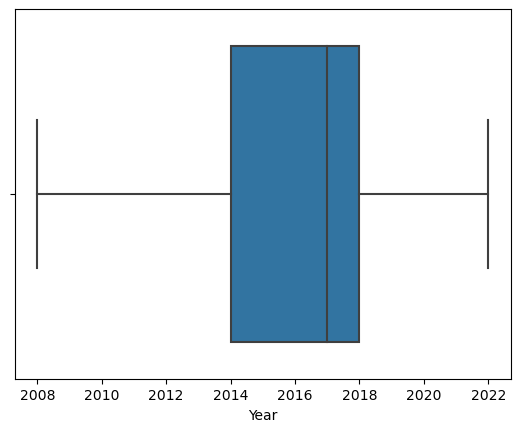

In [39]:
# box-plot for Year

sns.boxplot(data=Carwale_1,x=Carwale_1["Year"])

In [40]:
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Toyota,Innova 2,2013,7.85,Diesel,189,Mumbai,13036
1,Hyundai,Verna 1,2018,7.50,Petrol,16339,Kolkata,12455
2,Volkswagen,Ameo Highline,2016,6.50,Diesel,68962,Jalgaon,9133
3,BMW,7 Series,2011,15.90,Diesel,75000,Lucknow,9133
4,Maruti,Suzuki Swift,2014,4.40,Petrol,32682,Mumbai,7306
...,...,...,...,...,...,...,...,...
404,Mahindra,XUV500 W8,2013,6.58,Diesel,58865,Jamshedpur,10927
405,Hyundai,Grand i10,2018,4.75,Petrol,40699,Lucknow,7888
407,Honda,City V,2018,9.20,Petrol,22117,Mumbai,15278
408,Hyundai,Creta SX,2018,11.90,Petrol,50824,Mumbai,19761


In [41]:
Carwale_1.reset_index(drop = True, inplace = True)

In [42]:
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Toyota,Innova 2,2013,7.85,Diesel,189,Mumbai,13036
1,Hyundai,Verna 1,2018,7.50,Petrol,16339,Kolkata,12455
2,Volkswagen,Ameo Highline,2016,6.50,Diesel,68962,Jalgaon,9133
3,BMW,7 Series,2011,15.90,Diesel,75000,Lucknow,9133
4,Maruti,Suzuki Swift,2014,4.40,Petrol,32682,Mumbai,7306
...,...,...,...,...,...,...,...,...
355,Mahindra,XUV500 W8,2013,6.58,Diesel,58865,Jamshedpur,10927
356,Hyundai,Grand i10,2018,4.75,Petrol,40699,Lucknow,7888
357,Honda,City V,2018,9.20,Petrol,22117,Mumbai,15278
358,Hyundai,Creta SX,2018,11.90,Petrol,50824,Mumbai,19761


In [43]:
Carwale_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    360 non-null    int64  
 1   Company       360 non-null    object 
 2   Model         360 non-null    object 
 3   Year          360 non-null    int64  
 4   Price in Lak  360 non-null    float64
 5   Fuel          360 non-null    object 
 6   Kilometer     360 non-null    int32  
 7   City          360 non-null    object 
 8   EMIstarts     360 non-null    int32  
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 22.6+ KB


In [44]:
Carwale_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,360.0,205.919444,119.300429,0.00,103.75,206.5,307.25,409.00
Year,360.0,2016.486111,2.624043,2008.00,2014.00,2017.0,2018.00,2022.00
Price in Lak,360.0,6.364194,3.052305,1.05,4.75,5.8,7.50,32.95
Kilometer,360.0,48716.750000,23176.137028,111.00,34559.00,51157.0,66000.00,98000.00
EMIstarts,360.0,10200.447222,3888.245770,1.00,7888.00,9133.0,11458.00,22834.00


In [45]:
Carwale_1.drop(["Unnamed: 0"],axis = 1, inplace = True)

# Univariant 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price in Lak'>

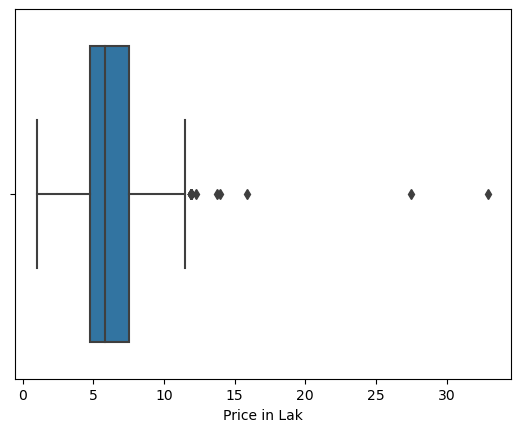

In [46]:
# Numeric data
# Continuous data
# the most of the cars purchased at a price in between 4.8lak to 8lak and also few cars were purchased after
# 13lak which is after upper fence.

sns.boxplot(Carwale_1["Price in Lak"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

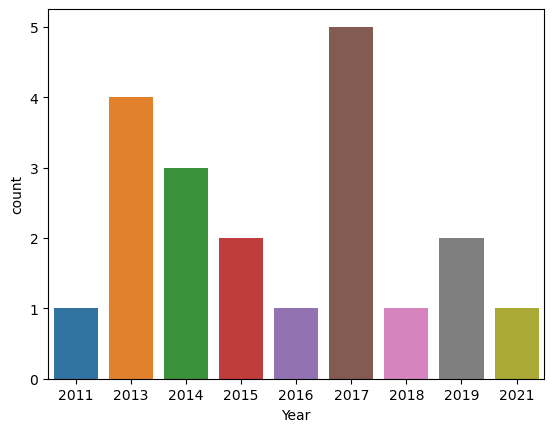

In [47]:
# Numerical data 
# Discrete data
# Used Cars in 2017 is more when compare to other model

sns.countplot(Carwale_1["Year"][:20])

<AxesSubplot:xlabel='Price in Lak', ylabel='Count'>

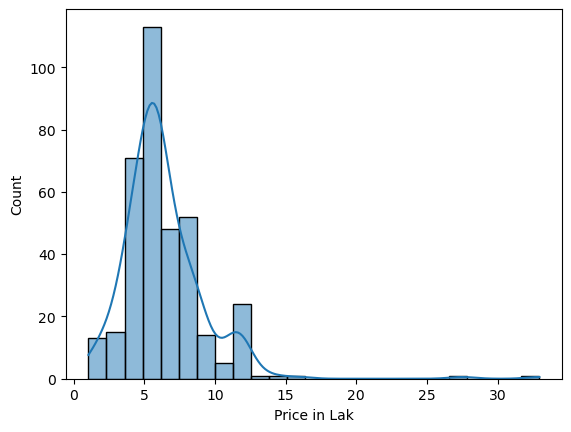

In [48]:
# Numerical data
# Continuos data 
# Count is more for 6lakhs price when compare to other prices 

sns.histplot(Carwale_1["Price in Lak"], kde = True, bins = 25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel', ylabel='count'>

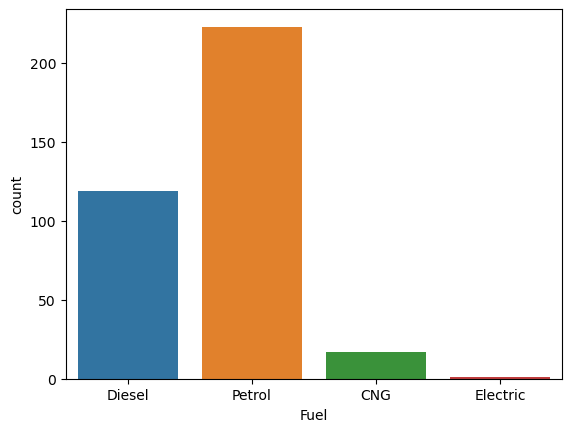

In [49]:
# Categorical data
# Petrol fuel having more count when compare to other fuel type and less count for Electric.

sns.countplot(Carwale_1["Fuel"])

([<matplotlib.patches.Wedge at 0x2cc31abadf0>,
 [Text(-0.40315130254983983, 1.0234593432337056, 'Petrol'),
  Text(0.2380834859557597, -1.073925627646139, 'Diesel'),
  Text(1.0849141486118126, -0.1815524446045994, 'CNG'),
  Text(1.0999581147085447, -0.009599264910628564, 'Electric')],
 [Text(-0.2199007104817308, 0.5582505508547484, '62%'),
  Text(0.12986371961223256, -0.5857776150797122, '33%'),
  Text(0.5917713537882613, -0.09902860614796331, '5%'),
  Text(0.5999771534773879, -0.00523596267852467, '0%')])

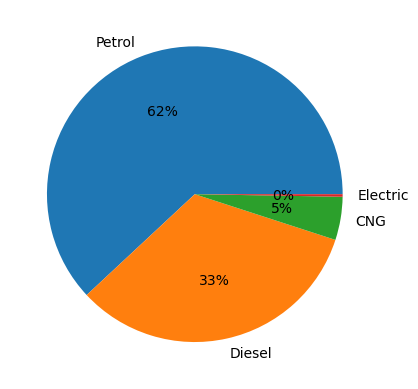

In [50]:
# Categorical data
# Petrol fuel type Cars are used 62% when compare to other fuel type and less for Electric

plt.pie(Carwale_1["Fuel"].value_counts(), labels = Carwale_1["Fuel"].value_counts().index, autopct = "%0.0f%%")

AxesSubplot(0.125,0.11;0.775x0.77)


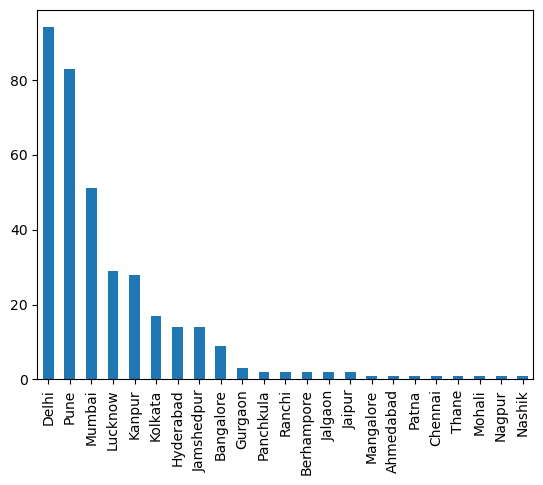

In [51]:
# Categorical data
# in Delhi used cars were purchased are higher than to other cities in india

print(Carwale_1["City"].value_counts().plot(kind = "bar"))

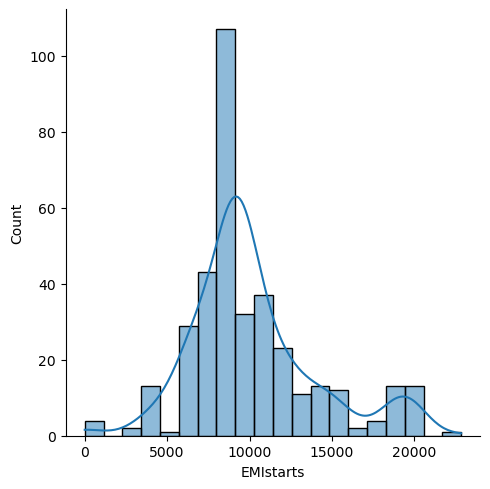

In [52]:
# Numerical data
# Continuos data 
# 8lakhs EMIstart cars have high count when compare to other EMIstarts count.

sns.displot(Carwale_1["EMIstarts"],kind="hist", bins = 20, kde = True)

<AxesSubplot:xlabel='Kilometer', ylabel='Count'>

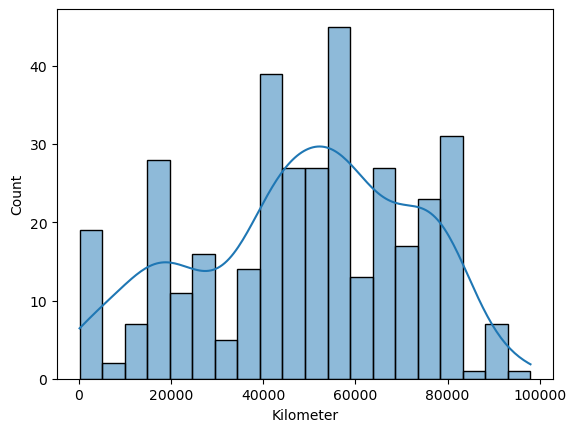

In [53]:
# Numerical data
# Continuos data
# the kilometer have high count at 56000km

sns.histplot(Carwale_1["Kilometer"], kde = True, bins = 20)

<AxesSubplot:xlabel='count', ylabel='Company'>

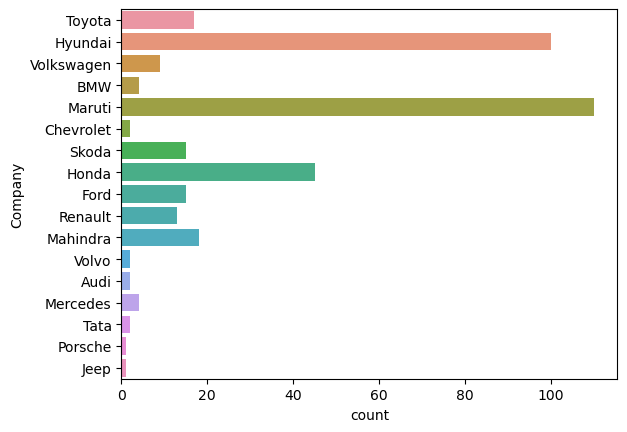

In [54]:
# Categorical data
# Maruti used cars were purchased highly when compare to other cars

sns.countplot(y = Carwale_1["Company"])

<AxesSubplot:ylabel='Company'>

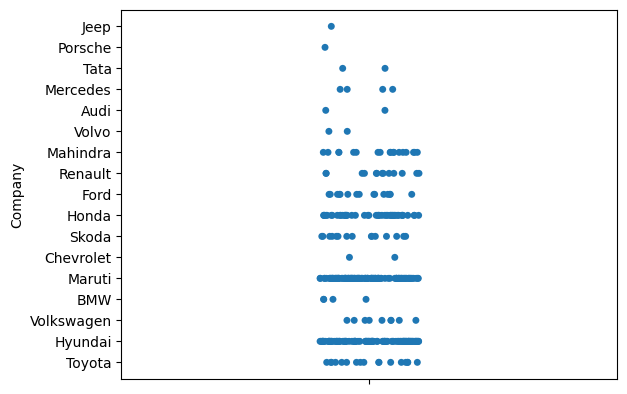

In [55]:
sns.stripplot(y = Carwale_1["Company"])

<AxesSubplot:ylabel='Model'>

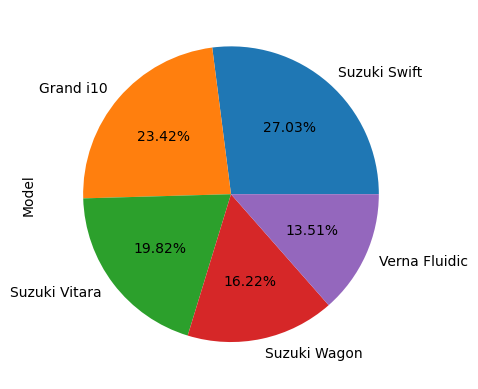

In [56]:
# Categorical data
# Suzuki Swift having more count when compare to other company model Cars

Carwale_1["Model"].value_counts()[:5].plot(kind = "pie", autopct = "%0.02f%%")

# Bivariant Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Kilometer', ylabel='Density'>

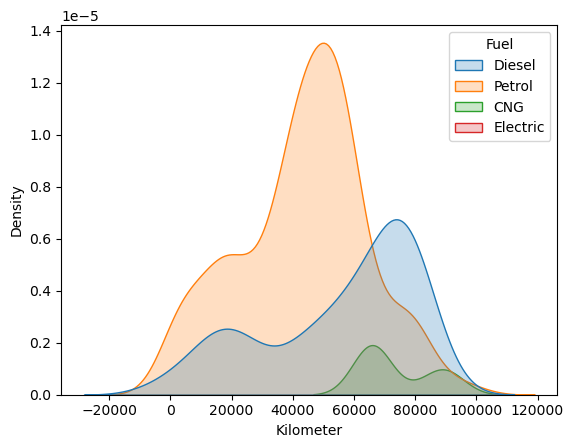

In [57]:
# One categorical and one numerical of continuous data
# petrol cars are purchased higher than remianing fuels

sns.kdeplot(data = Carwale_1, x = "Kilometer", shade = True, hue = "Fuel")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Kilometer'>

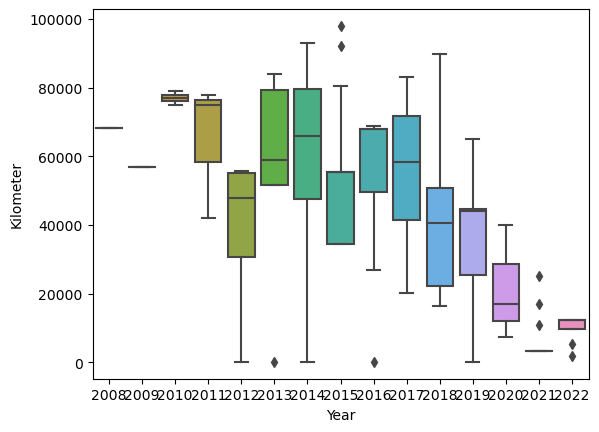

In [58]:
sns.boxplot(Carwale_1["Year"], Carwale_1["Kilometer"])

<AxesSubplot:xlabel='Kilometer', ylabel='Count'>

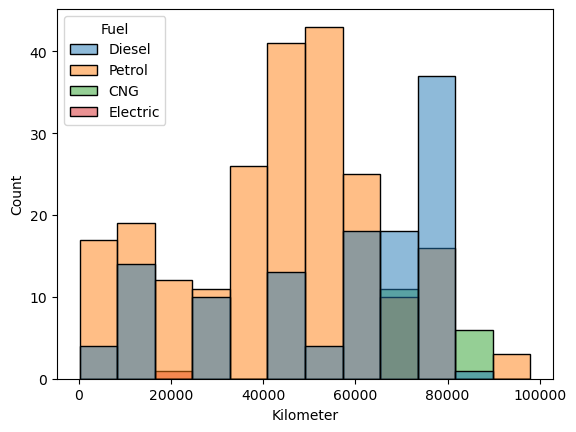

In [59]:
# One categorical and one numerical of continuous data
# petrol Cars are purchased highly with 56k kilometer.

sns.histplot(data = Carwale_1, x = Carwale_1["Kilometer"], hue = Carwale_1["Fuel"])

<AxesSubplot:xlabel='Count', ylabel='Price in Lak'>

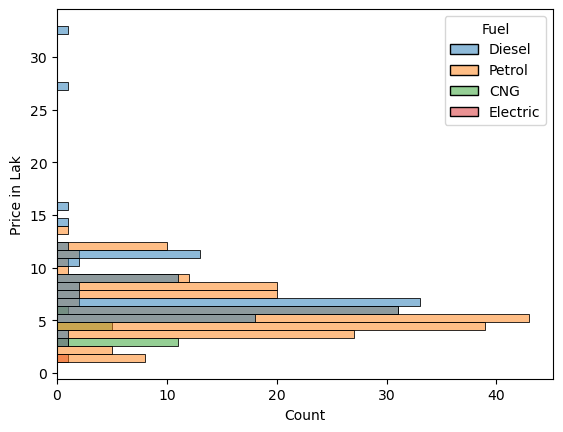

In [60]:
# One categorical and one numerical of continuous data
# petrol and diesel cars are used higher than remianing fuels and price at 6lak

sns.histplot(data = Carwale_1, y = Carwale_1["Price in Lak"], hue = Carwale_1["Fuel"])

<AxesSubplot:xlabel='EMIstarts', ylabel='Count'>

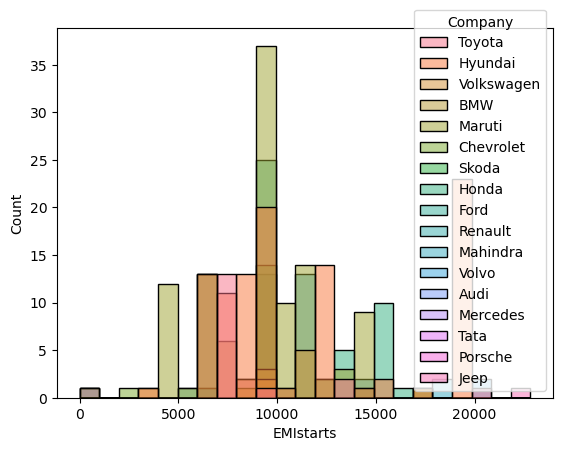

In [61]:
# One categorical and one numerical of continuous data
# for used cars mostly EMIstarts from 9k for maruti,skoda etc.

sns.histplot(data = Carwale_1, x = Carwale_1["EMIstarts"], hue = Carwale_1["Company"])    

<AxesSubplot:xlabel='Price in Lak', ylabel='Year'>

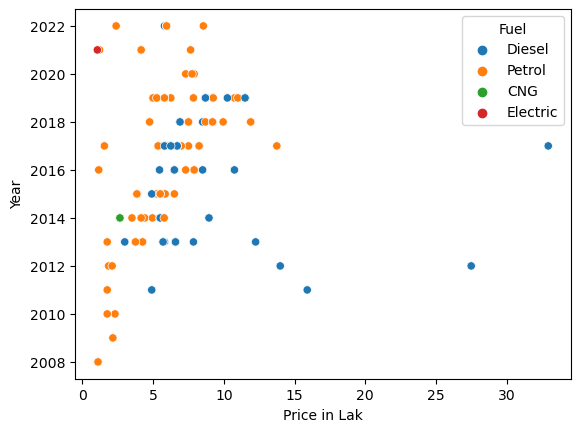

In [62]:
# Two numerical and one categorical data 
# most of the cars are purchased by petrol and 2019 model and having price in between 7lak to 10lak


sns.scatterplot(y = Carwale_1["Year"], x = Carwale_1["Price in Lak"], hue = Carwale_1["Fuel"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer', ylabel='Price in Lak'>

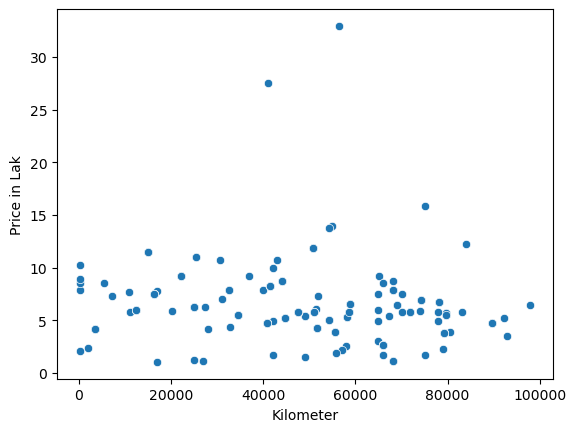

In [63]:
# Two numerical data of continuous data
# purchased high cars at price of 4 to 8lak and with 66k to 80k kilometers

sns.scatterplot(Carwale_1["Kilometer"], Carwale_1["Price in Lak"])  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer', ylabel='Price in Lak'>

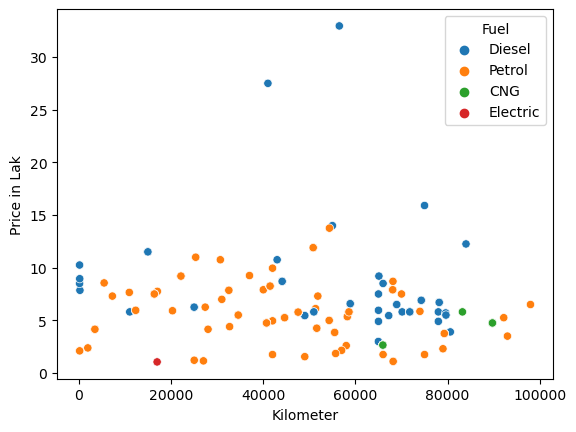

In [64]:
# Two numerical data of continuous data
# purchased high cars at price of 4 to 8lak and with 66k to 80k kilometers and mostly purchased Diesel cars 

sns.scatterplot(Carwale_1["Kilometer"], Carwale_1["Price in Lak"], hue = Carwale_1["Fuel"])  

<AxesSubplot:xlabel='Price in Lak', ylabel='Kilometer'>

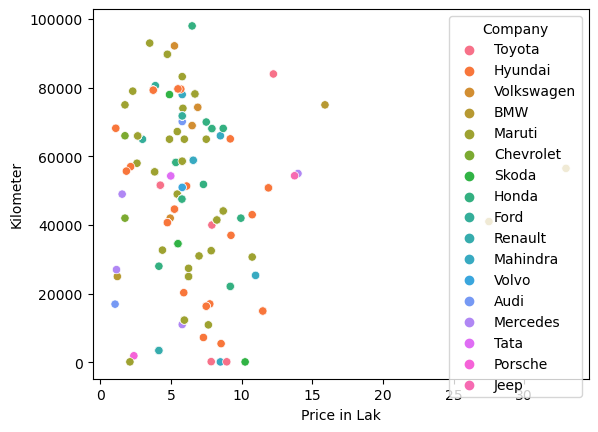

In [65]:
# # Two numerical data of continuous data
# purchased high cars at price of 4 to 8lak and with 66k to 80k kilometers and mostly purchased Diesel cars 
# purchased maruthi cars highly

sns.scatterplot(y = Carwale_1["Kilometer"], x = Carwale_1["Price in Lak"], hue = Carwale_1["Company"])  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer', ylabel='Price in Lak'>

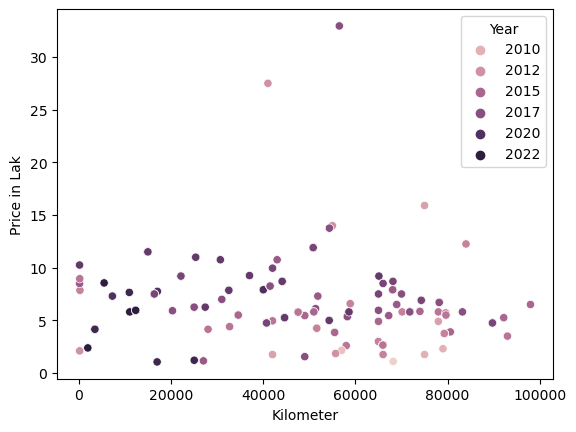

In [66]:
# # # Two numerical data of continuous data
# purchased high cars at price of 4 to 8lak and with 66k to 80k kilometers and mostly purchased Diesel cars 
# 2012 model cars highly purchased


sns.scatterplot(Carwale_1["Kilometer"], Carwale_1["Price in Lak"], hue = Carwale_1["Year"])

<AxesSubplot:xlabel='EMIstarts', ylabel='Price in Lak'>

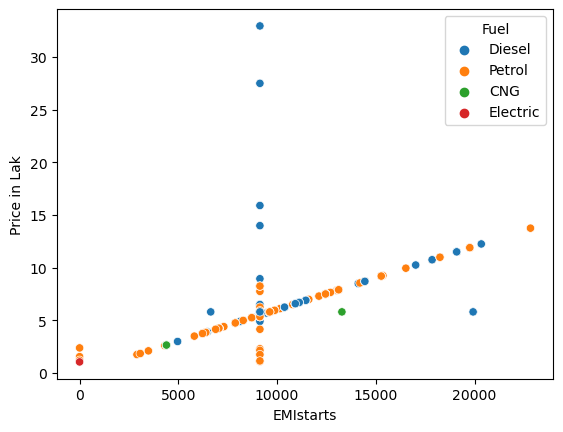

In [67]:
# Two numerical data and one categorical data
# Many of the petrol cars are purchased at price 5lak to 7lak and EMIstarts at 8k to 13k 

sns.scatterplot(y = Carwale_1["Price in Lak"], x = Carwale_1["EMIstarts"], hue =Carwale_1["Fuel"])

<AxesSubplot:xlabel='Price in Lak', ylabel='EMIstarts'>

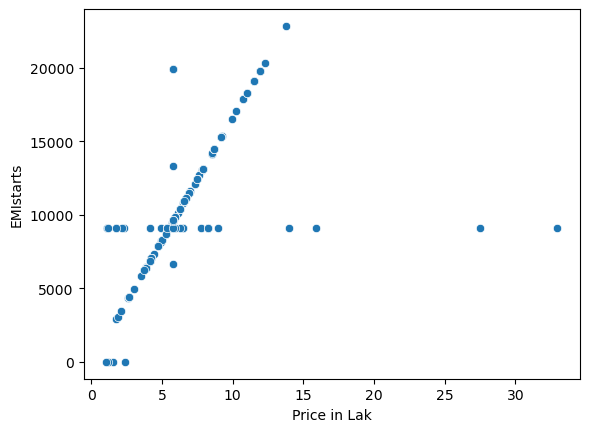

In [68]:
# Two numerical data 
# most of the cars are purchased at 5lak to 8lak and with EMIstarts of 6k to 13k 

sns.scatterplot(x = Carwale_1["Price in Lak"], y = Carwale_1["EMIstarts"])

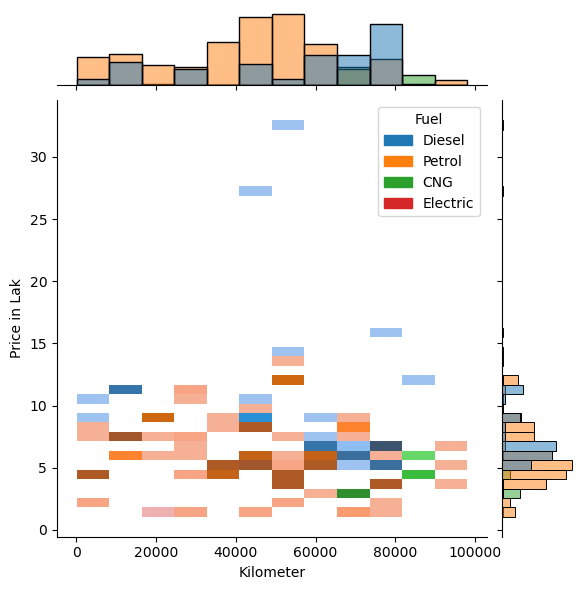

In [69]:
sns.jointplot(y = Carwale_1["Price in Lak"], x = Carwale_1["Kilometer"], hue = Carwale_1["Fuel"], kind = "hist")

In [70]:
'''sns.catplot(data = Carwale_1,
           x = "Kilometer",
           kind = "count",
           hue = "Fuel",
           row = "Price in Lak",
           col = "City")'''

'sns.catplot(data = Carwale_1,\n           x = "Kilometer",\n           kind = "count",\n           hue = "Fuel",\n           row = "Price in Lak",\n           col = "City")'

In [71]:
Carwale_1

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Toyota,Innova 2,2013,7.85,Diesel,189,Mumbai,13036
1,Hyundai,Verna 1,2018,7.50,Petrol,16339,Kolkata,12455
2,Volkswagen,Ameo Highline,2016,6.50,Diesel,68962,Jalgaon,9133
3,BMW,7 Series,2011,15.90,Diesel,75000,Lucknow,9133
4,Maruti,Suzuki Swift,2014,4.40,Petrol,32682,Mumbai,7306
...,...,...,...,...,...,...,...,...
355,Mahindra,XUV500 W8,2013,6.58,Diesel,58865,Jamshedpur,10927
356,Hyundai,Grand i10,2018,4.75,Petrol,40699,Lucknow,7888
357,Honda,City V,2018,9.20,Petrol,22117,Mumbai,15278
358,Hyundai,Creta SX,2018,11.90,Petrol,50824,Mumbai,19761


<AxesSubplot:xlabel='Year', ylabel='Price in Lak'>

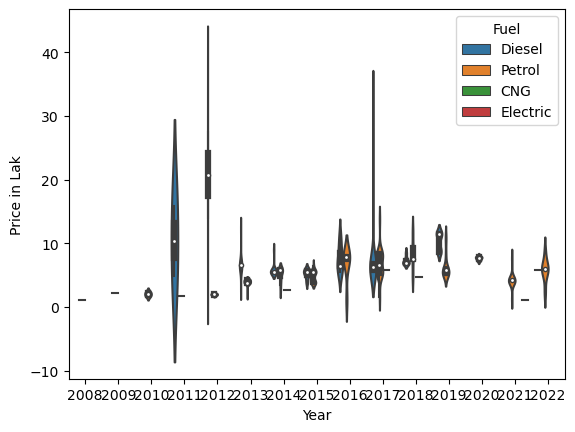

In [72]:
sns.violinplot(y = Carwale_1["Price in Lak"], x = Carwale_1["Year"], hue = Carwale_1["Fuel"])

# MultiVariant Analysis

In [73]:
Carwale_1

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Toyota,Innova 2,2013,7.85,Diesel,189,Mumbai,13036
1,Hyundai,Verna 1,2018,7.50,Petrol,16339,Kolkata,12455
2,Volkswagen,Ameo Highline,2016,6.50,Diesel,68962,Jalgaon,9133
3,BMW,7 Series,2011,15.90,Diesel,75000,Lucknow,9133
4,Maruti,Suzuki Swift,2014,4.40,Petrol,32682,Mumbai,7306
...,...,...,...,...,...,...,...,...
355,Mahindra,XUV500 W8,2013,6.58,Diesel,58865,Jamshedpur,10927
356,Hyundai,Grand i10,2018,4.75,Petrol,40699,Lucknow,7888
357,Honda,City V,2018,9.20,Petrol,22117,Mumbai,15278
358,Hyundai,Creta SX,2018,11.90,Petrol,50824,Mumbai,19761


In [74]:
Carwale_1["Year"].unique()

array([2013, 2018, 2016, 2011, 2014, 2017, 2015, 2019, 2021, 2022, 2010,
       2012, 2009, 2020, 2008], dtype=int64)

<AxesSubplot:>

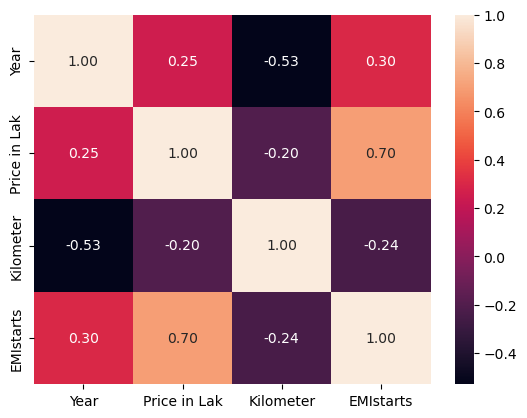

In [81]:
# Several with numerical data 
# price of car is increasing with respect to increasing year
# The price of car is decreasing with respect to increasing year
# The price of car is increasing with respect to increasing EMIstarts 
# The price of car decreasing with respect to kilometer
# if kilometer increases price,EMI, decreasing
# EMI increasing with respect to if price and year increases


Carwale_1.corr()
sns.heatmap(Carwale_1.corr(),
           annot = True,
           fmt = ".2f")

# Pairplot

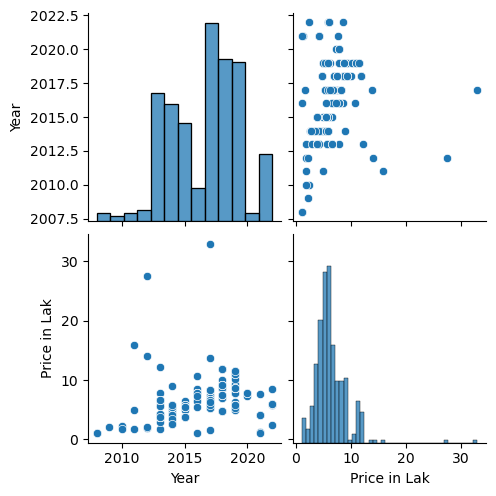

In [82]:
Carwale_2 = Carwale_1.select_dtypes(include = ["float64", "int64"])
sns.pairplot(Carwale_2)

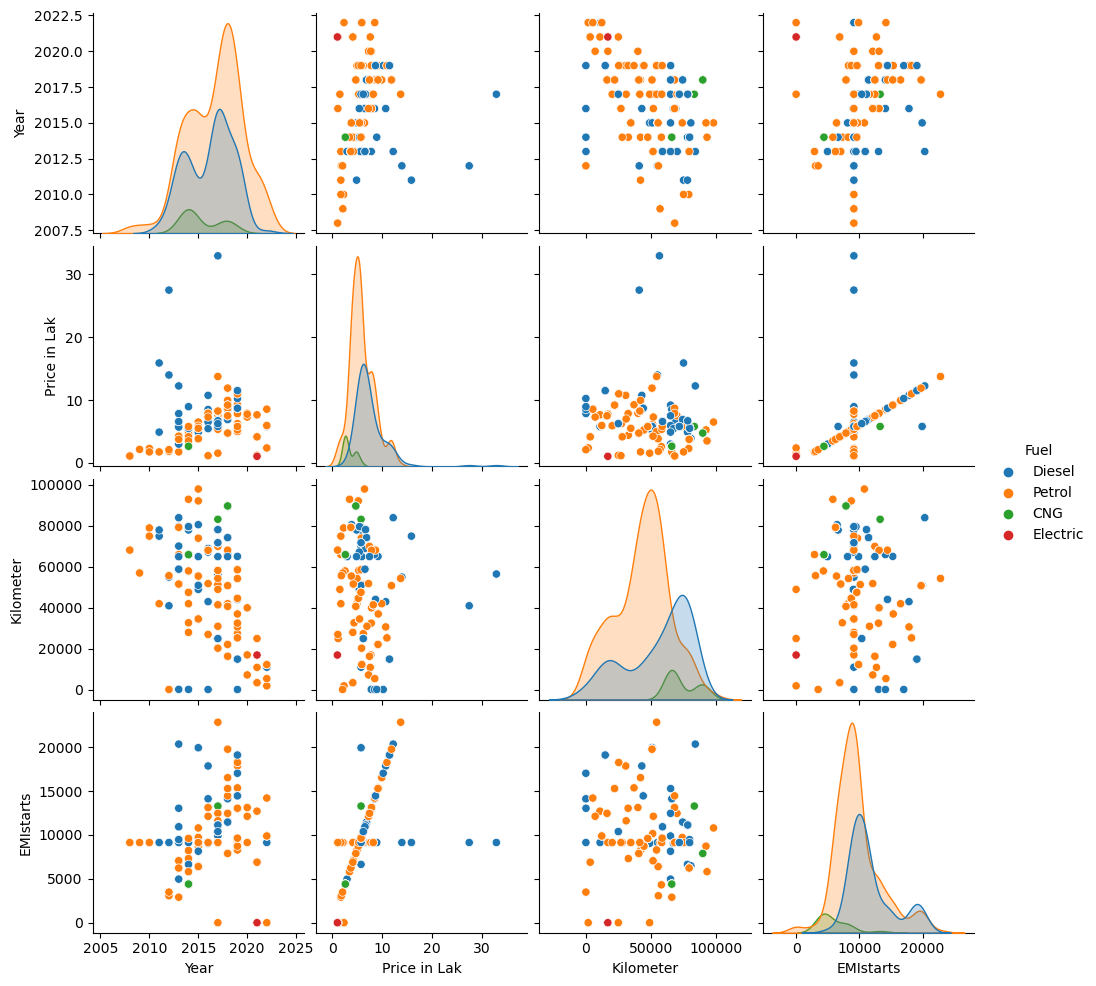

In [83]:
sns.pairplot(Carwale_1, hue = "Fuel")

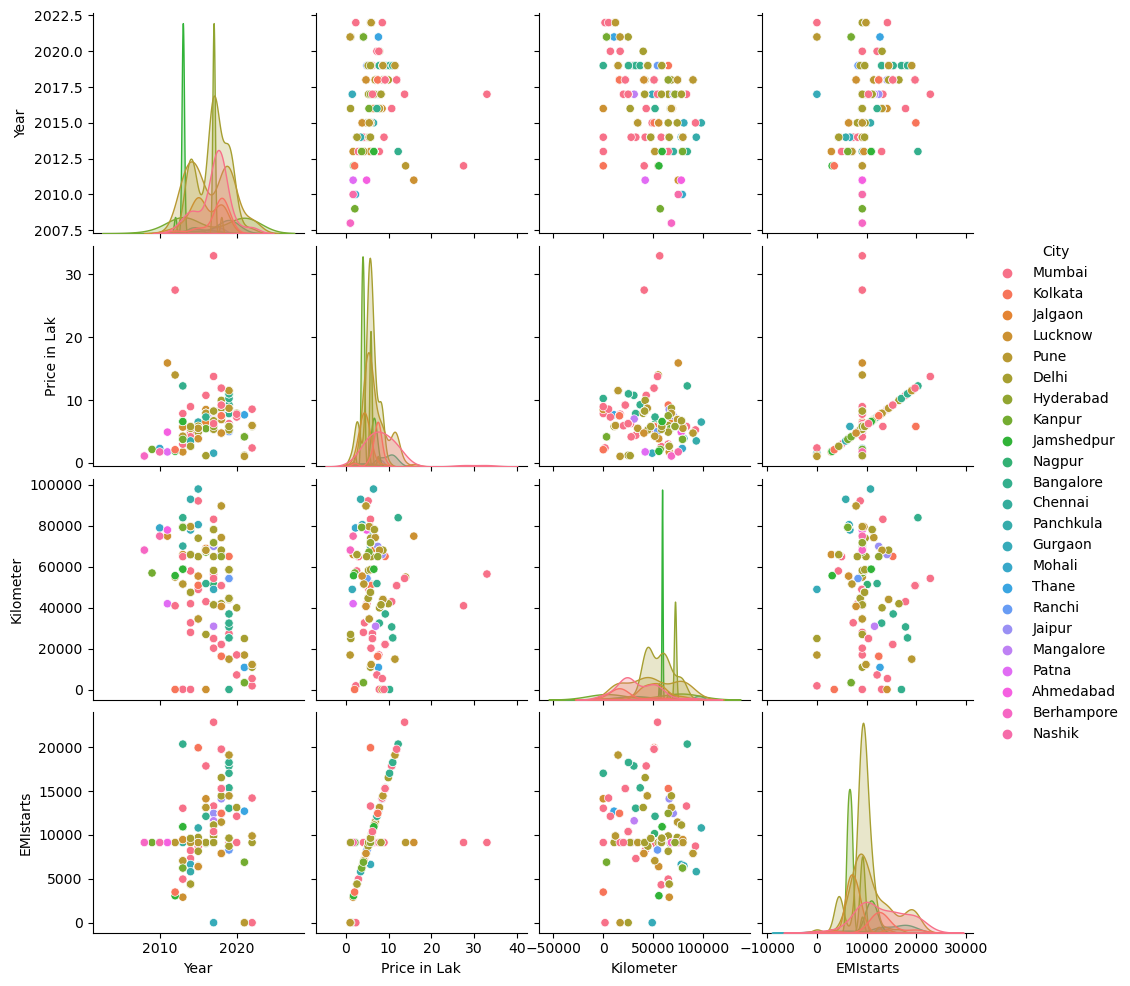

In [84]:
sns.pairplot(Carwale_1, hue = "City")

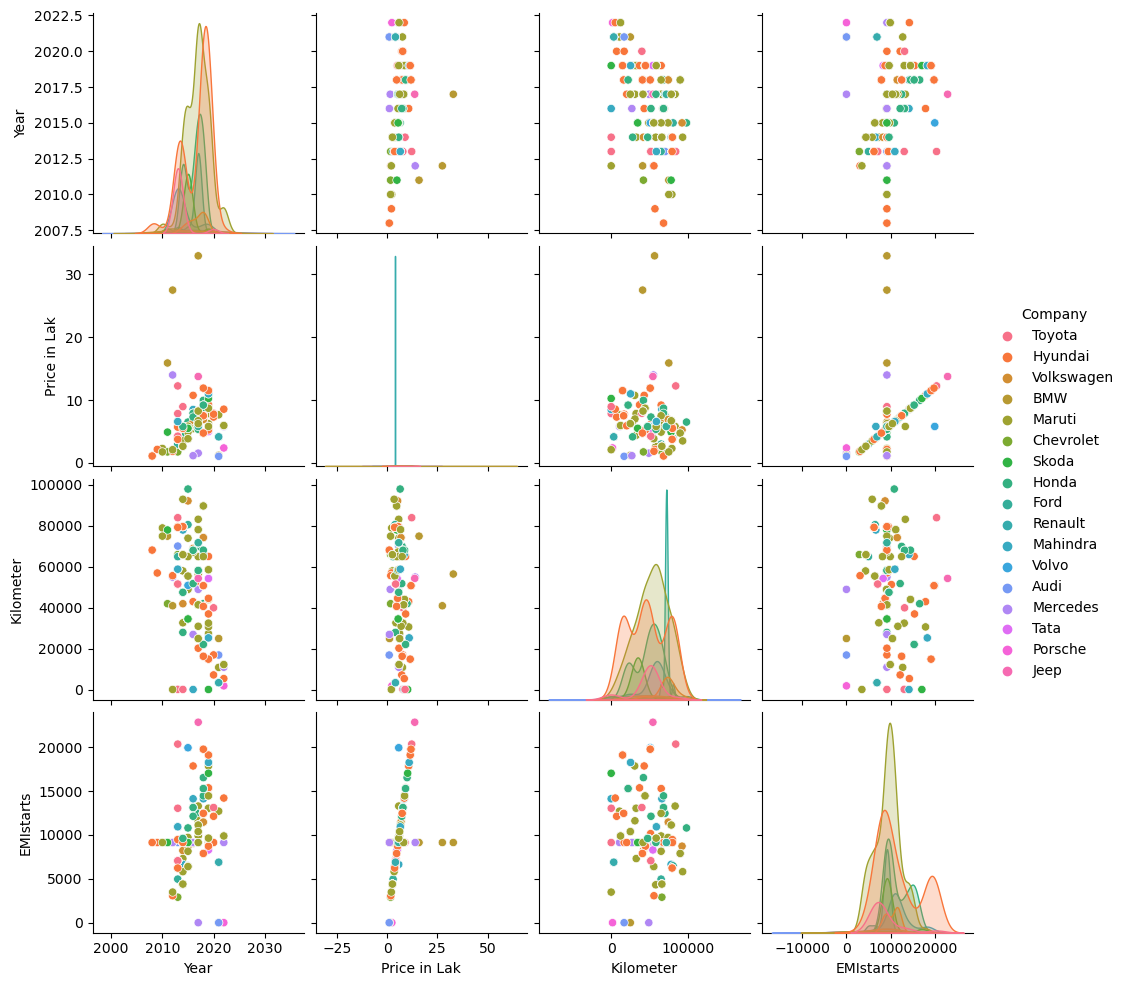

In [85]:
sns.pairplot(Carwale_1, hue = "Company")